In [48]:
#PROCESS TO FOLLOW TO WORK ON THE DATASET GIVE POSSEM DATASET
## Data Science pipeline
#1. Preliminary analysis
#2. EDA Exploratory data analysis
#3. Data cleaning
#4. Analysis(Data Wrangling)
#5. Data preprocessing and data mining
#6. Building your model(prediction, forcasting, classification, clustering)
#7. Reporting and visualization
#8. Deployment
#9. Maintenance and monitoring
#10.Support and troubleshooting
#----> Please note that from step2 to step5 is an iterative process that is dependent on step 6. Step 6 itself could also be iterative
# load_data(path)

# inspect_data(df)

# clean_data(df)

# feature_engineer(df)

# encode_and_scale(df)

# eda_plots(df, numeric_cols=...)

# build_and_evaluate_model(df, target_col='sex')

# save_clean(df, path)


#    Preliminary Discriptive Analysis

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns


In [50]:
! pip install kagglehub --quiet
import kagglehub
from pathlib import Path
path = kagglehub.dataset_download("abrambeyer/openintro-possum")
possum = Path('possum.csv')
path_full = path / possum

print("Path to dataset files:", path)



Path to dataset files: C:\Users\ncc5444\.cache\kagglehub\datasets\abrambeyer\openintro-possum\versions\1


In [51]:
df = pd.read_csv(path_full)
df.head(50)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


In [52]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("abrambeyer/openintro-possum")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\ncc5444\.cache\kagglehub\datasets\abrambeyer\openintro-possum\versions\1


In [53]:
import pandas as pd

df = pd.read_csv("possum.csv")
df.dropna(inplace=True)
df.head()
df.dtypes
df.drop_duplicates(inplace=True)
#df.dtypes.value_counts().plot(kind="bar", xlabel = "Data Types", ylabel = "Count")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB
None


In [54]:
df.head(150)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [55]:
df.tail(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
94,95,7,other,m,4.0,91.6,56.6,88.5,37.5,64.5,45.4,14.9,27.0,31.0
95,96,7,other,m,4.0,94.8,55.7,83.0,38.0,66.5,47.7,14.0,25.0,33.0
96,97,7,other,m,3.0,91.0,53.1,86.0,38.0,63.8,46.0,14.5,25.0,31.5
97,98,7,other,m,5.0,93.2,68.6,84.0,35.0,65.6,44.3,14.5,28.5,32.0
98,99,7,other,f,3.0,93.3,56.2,86.5,38.5,64.8,43.8,14.0,28.0,35.0
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [56]:
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [57]:
df.shape

(101, 14)

In [58]:
df.loc[0:] 

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [59]:
df.loc[[0,1,2,3,4,5,6,7,8,9,10]] 

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


In [60]:
df.iloc[0:] 

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [61]:
df.head(103)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [62]:
df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103],
      dtype='int64', length=101)

In [63]:
unique_index = df.index.unique().sort_values()
unique_index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103],
      dtype='int64', length=101)

In [64]:
df.index.value_counts().head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: count, dtype: int64

<Axes: ylabel='count'>

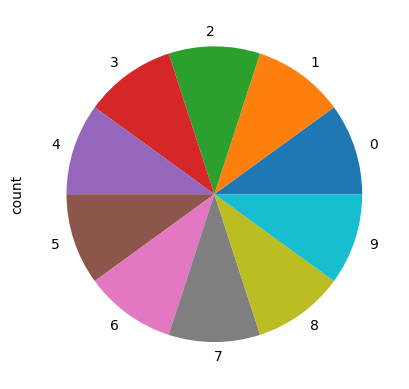

In [65]:
df.index.value_counts().head(10).plot(kind = 'pie')

<Axes: >

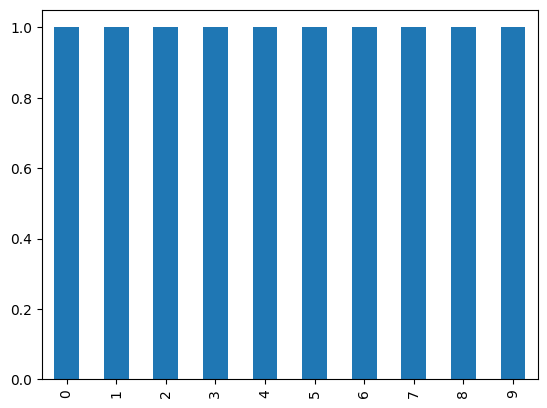

In [66]:
df.index.value_counts().head(10).plot(kind = 'bar')

In [67]:
unique_index.nunique()

101

In [68]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [69]:
len(df.columns)

14

In [70]:
print("list Bottom 50 information of the dataset:", df.tail(50))
print('\n')

list Bottom 50 information of the dataset:      case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
54     55     4  other   m  2.0    103.1    63.2      92.5   38.0      72.5   
55     56     4  other   m  3.0     99.9    61.5      93.7   38.0      68.7   
56     57     4  other   f  4.0     95.1    59.4      93.0   41.0      67.2   
57     58     4  other   m  3.0     94.5    64.2      91.0   39.0      66.5   
58     59     4  other   m  2.0    102.5    62.8      96.0   40.0      73.2   
59     60     4  other   f  2.0     91.3    57.7      88.0   39.0      63.1   
60     61     5  other   m  7.0     95.7    59.0      86.0   38.0      63.1   
61     62     5  other   f  3.0     91.3    58.0      90.5   39.0      65.5   
62     63     5  other   f  6.0     92.0    56.4      88.5   38.0      64.1   
63     64     5  other   f  3.0     96.9    56.5      89.5   38.5      63.0   
64     65     5  other   f  5.0     93.5    57.4      88.5   38.0      68.2   
65     66

In [71]:
print("Descriptive statistics of the dataset on the numerical features of it. Is below:", df.describe())
print('\n')

Descriptive statistics of the dataset on the numerical features of it. Is below:              case        site         age     hdlngth      skullw    totlngth  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean    52.762376    3.673267    3.821782   92.730693   56.960396   87.269307   
std     30.573894    2.366892    1.915182    3.518714    3.102679    4.196802   
min      1.000000    1.000000    1.000000   82.500000   50.000000   75.000000   
25%     26.000000    1.000000    2.000000   90.700000   55.000000   84.500000   
50%     54.000000    4.000000    3.000000   92.900000   56.400000   88.000000   
75%     79.000000    6.000000    5.000000   94.800000   58.100000   90.000000   
max    104.000000    7.000000    9.000000  103.100000   68.600000   96.500000   

            taill    footlgth    earconch         eye       chest       belly  
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000  
mean    37.049505   68.398020

In [72]:
print("Descriptive statistics of the dataset including the categorical features:", df.describe(include = 'all'))

Descriptive statistics of the dataset including the categorical features:               case        site    Pop  sex         age     hdlngth  \
count   101.000000  101.000000    101  101  101.000000  101.000000   
unique         NaN         NaN      2    2         NaN         NaN   
top            NaN         NaN  other    m         NaN         NaN   
freq           NaN         NaN     58   59         NaN         NaN   
mean     52.762376    3.673267    NaN  NaN    3.821782   92.730693   
std      30.573894    2.366892    NaN  NaN    1.915182    3.518714   
min       1.000000    1.000000    NaN  NaN    1.000000   82.500000   
25%      26.000000    1.000000    NaN  NaN    2.000000   90.700000   
50%      54.000000    4.000000    NaN  NaN    3.000000   92.900000   
75%      79.000000    6.000000    NaN  NaN    5.000000   94.800000   
max     104.000000    7.000000    NaN  NaN    9.000000  103.100000   

            skullw    totlngth       taill    footlgth    earconch  \
count   101.000

In [73]:
print(f"Below are all the features of the dataset:\n {df.columns}")

Below are all the features of the dataset:
 Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')


In [74]:
# To check total number of missing data in each column and we can see that we have no missing data
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

Statistical data Analysis of Possum Data

In [75]:
#  We need to  median to handle the missing data for the age and footlength of the possum.This is because median is robust against outliers compare to mean
# Finally we find the median values of age and footlength features of the possum

age_mid = df['age'].median()
print("The median age of the possum is:", float(age_mid))
print('\n')
flgth_mid = df['footlgth'].median()
print("The median footlgth of the possum is:", float(flgth_mid))

The median age of the possum is: 3.0


The median footlgth of the possum is: 67.9


In [76]:
 # Now we go to next finding 
# Using median to handle the missing data for the age and footlength of the possum by median imputation
df['age'] = df['age'].fillna(age_mid)
df['footlgth'] = df['age'].fillna(flgth_mid)


In [77]:
#check the missing value again to see if it has been filled
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [78]:
# conclusively on the Premilinary Investigation we can see now that no duplicated also
# To check if there is duplicate in the dataset
df.duplicated().sum()
int(df.duplicated().sum())

0

In [79]:
# Age variable
mean_age = df['age'].mean()
print(f"The mean age of the possum : {round(float(mean_age), 1)} years") # to round to 1.dp
print('\n')
median_age = df['age'].median()
print(f"The median age of the possum : {float(median_age)} years")
print('\n')
modal_age = df['age'].mode().iloc[0]
print(f"The modal age of the possum : {float(modal_age)} years")
print('\n')
# headlength
mean_hdlngth = df['hdlngth'].mean()
print(f"The mean head length of the possum : {round(float(mean_hdlngth), 1)} mm") # to round to 1.dp
print('\n')
median_hdlngth = df['hdlngth'].median()
print(f"The median head length of the possum : {float(median_hdlngth)} mm")
print('\n')
modal_hdlngth = df['hdlngth'].mode().iloc[0]
print(f"The mode head length of the possum : {float(modal_hdlngth)} mm")
print('\n')


The mean age of the possum : 3.8 years


The median age of the possum : 3.0 years


The modal age of the possum : 3.0 years


The mean head length of the possum : 92.7 mm


The median head length of the possum : 92.9 mm


The mode head length of the possum : 93.3 mm




MEASURE OF CENTER

In [80]:
# List of numerical features
numerical_features = ['age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
# Define units for numerical features
units = {
    'age': 'years',
    'hdlngth': 'mm',
    'skullw': 'mm',
    'totlngth': 'mm',
    'taill': 'mm',
    'footlgth': 'mm',
    'earconch': 'mm',
    'eye': 'mm',
    'chest': 'mm',
    'belly': 'mm'
}
# Compute mean, median, and mode for each numerical feature using a for loop
for col in numerical_features:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode().iloc[0]
    unit = units[col]
    print(f"\nMeasure of Center for {col} in {unit}:")
    print(f"  Mean: {mean_val:.2f} {unit}")
    print(f"  Median: {median_val:.2f} {unit}")
    print(f"  Mode: {mode_val:.2f} {unit}")
print('\n')
# List of categorical feature
categorical_features = ['site', 'Pop', 'sex']
print("\nFrequency Analysis for Categorical Features:")



Measure of Center for age in years:
  Mean: 3.82 years
  Median: 3.00 years
  Mode: 3.00 years

Measure of Center for hdlngth in mm:
  Mean: 92.73 mm
  Median: 92.90 mm
  Mode: 93.30 mm

Measure of Center for skullw in mm:
  Mean: 56.96 mm
  Median: 56.40 mm
  Mode: 57.60 mm

Measure of Center for totlngth in mm:
  Mean: 87.27 mm
  Median: 88.00 mm
  Mode: 89.00 mm

Measure of Center for taill in mm:
  Mean: 37.05 mm
  Median: 37.00 mm
  Mode: 38.00 mm

Measure of Center for footlgth in mm:
  Mean: 3.82 mm
  Median: 3.00 mm
  Mode: 3.00 mm

Measure of Center for earconch in mm:
  Mean: 48.13 mm
  Median: 46.80 mm
  Mode: 44.90 mm

Measure of Center for eye in mm:
  Mean: 15.05 mm
  Median: 14.90 mm
  Mode: 14.50 mm

Measure of Center for chest in mm:
  Mean: 27.06 mm
  Median: 27.00 mm
  Mode: 28.00 mm

Measure of Center for belly in mm:
  Mean: 32.64 mm
  Median: 32.50 mm
  Mode: 32.00 mm



Frequency Analysis for Categorical Features:


MEASURE OF SPREAD

In [81]:
#   spread 
# Compute mean, median, and mode for each numerical feature using a for loop
for col in categorical_features:
    print(f"\nUnique value for {col}:\n", df[col].unique())
    print(f"\nFrequency Distribution for {col}:\n", df[col].value_counts())
# Compute variance, standard deviation, Range for each numerical feature using a for loop
for col in numerical_features:
    min_val = df[col].min()
    max_val = df[col].max()
    range_value  = df[col].max()- df[col].min()
    variance_val = df[col].var()
    std_val = df[col].std()
    q25 = df[col].quantile(0.25)
    q50 = df[col].quantile(0.50)
    q75 = df[col].quantile(0.75)
    iqr_val = q75 - q25
    skewness_val = skew(df[col])
    kurtosis_val = kurtosis(df[col])
    unit = units[col]
    print(f"\nMeasure of Spread for {col} in {unit}:")
    print(f"  Minimum : {min_val:.2f} {unit}")
    print(f"  Maximum: {max_val:.2f} {unit}")
    print(f"  Range: {range_value:.2f} {unit}")
    print(f"  Variance: {variance_val:.2f} {unit}")
    print(f"  standard deviation: {variance_val:.2f} {unit}")
    print(f"  25th Percentile (Q1): {q25:.2f} {unit}")
    print(f"  50th Percentile (Median/Q2): {q50:.2f} {unit}")
    print(f"  75th Percentile (Q3): {q75:.2f} {unit}")
    print(f"  IQR: {iqr_val:.2f} {unit}")
    print(f"  skewness: {skewness_val:.2f} {unit}")
    print(f"  Kurtosis: {kurtosis_val:.2f} {unit}")
    


Unique value for site:
 [1 2 3 4 5 6 7]

Frequency Distribution for site:
 site
1    33
7    18
5    13
6    13
2    10
3     7
4     7
Name: count, dtype: int64

Unique value for Pop:
 ['Vic' 'other']

Frequency Distribution for Pop:
 Pop
other    58
Vic      43
Name: count, dtype: int64

Unique value for sex:
 ['m' 'f']

Frequency Distribution for sex:
 sex
m    59
f    42
Name: count, dtype: int64

Measure of Spread for age in years:
  Minimum : 1.00 years
  Maximum: 9.00 years
  Range: 8.00 years
  Variance: 3.67 years
  standard deviation: 3.67 years
  25th Percentile (Q1): 2.00 years
  50th Percentile (Median/Q2): 3.00 years
  75th Percentile (Q3): 5.00 years
  IQR: 3.00 years
  skewness: 0.55 years
  Kurtosis: -0.32 years

Measure of Spread for hdlngth in mm:
  Minimum : 82.50 mm
  Maximum: 103.10 mm
  Range: 20.60 mm
  Variance: 12.38 mm
  standard deviation: 12.38 mm
  25th Percentile (Q1): 90.70 mm
  50th Percentile (Median/Q2): 92.90 mm
  75th Percentile (Q3): 94.80 mm
  IQ

#   Detect Outliers

In [82]:
#Detect and handle outliers in numeric features using IQR
def detect_outliers_iqr(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = x[(x < lower_bound) | (x > upper_bound)]
    return {
        "outliers": outliers,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }
# Detect and handle outliers in numeric features using Normalization / Standardization
def detect_outliers_zscore(x, threshold=3):
    z_scores = (x - x.mean()) / x.std()
    outliers = x[abs(z_scores) > threshold]
    return {
        "outliers": outliers,
        "z_scores": z_scores,
        "threshold": threshold
    }
# Detect outliers
for col in numerical_features:
    print(f"\nIQR Outlier Detection for {col}")
    iqr_result = detect_outliers_iqr(df[col].dropna())
    print("Lower Bound:", iqr_result["lower_bound"])
    print("Upper Bound:", iqr_result["upper_bound"])
    print("Outliers:\n", iqr_result["outliers"].values)
    print(f"\nZ-Score Outlier Detection for {col}")
    zscore_result = detect_outliers_zscore(df[col].dropna())
    print("Threshold:", zscore_result["threshold"])
    print("Outliers:\n", zscore_result["outliers"].values)






IQR Outlier Detection for age
Lower Bound: -2.5
Upper Bound: 9.5
Outliers:
 []

Z-Score Outlier Detection for age
Threshold: 3
Outliers:
 []

IQR Outlier Detection for hdlngth
Lower Bound: 84.55000000000001
Upper Bound: 100.94999999999999
Outliers:
 [103.1 102.5  82.5]

Z-Score Outlier Detection for hdlngth
Threshold: 3
Outliers:
 []

IQR Outlier Detection for skullw
Lower Bound: 50.349999999999994
Upper Bound: 62.75
Outliers:
 [67.7 63.2 63.  63.2 64.2 62.8 50.  68.6]

Z-Score Outlier Detection for skullw
Threshold: 3
Outliers:
 [67.7 68.6]

IQR Outlier Detection for totlngth
Lower Bound: 76.25
Upper Bound: 98.25
Outliers:
 [75.]

Z-Score Outlier Detection for totlngth
Threshold: 3
Outliers:
 []

IQR Outlier Detection for taill
Lower Bound: 33.0
Upper Bound: 41.0
Outliers:
 [32.  32.  43.  41.5]

Z-Score Outlier Detection for taill
Threshold: 3
Outliers:
 [43.]

IQR Outlier Detection for footlgth
Lower Bound: -2.5
Upper Bound: 9.5
Outliers:
 []

Z-Score Outlier Detection for footlgth